In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import os, glob, inspect, sys


currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib' from '/home/marie-anne/code/Oct20_EPRI/Task1/NB/epri_mc_lib.py'>

# Import data

In [3]:
data_path = "../../Data/Merged_data"
df = pd.read_csv(os.path.join(data_path, 'ALL_TUBE_PIPE_merge_1.csv'), 
                 index_col=0)
df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,std_MBN,median_CF_g,mean_CF_g,std_CF_g,median_perm_g,mean_perm_g,std_perm_g,median_pMBN_g,mean_pMBN_g,std_pMBN_g
T_B1,12.947951,0.073112,0.000234,0.000018,0.0175,0.0042,0.001264,0.000519,4.410000e-13,4.090000e-07,...,0.127282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B2,12.920068,0.077814,0.000571,0.000139,0.0240,0.0057,0.002486,0.000816,1.520000e-06,1.510000e-06,...,0.110443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B3,12.932865,0.088762,0.000244,0.000030,0.0134,0.0028,0.001168,0.000555,4.270000e-13,5.640000e-07,...,0.178157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B4,10.763517,0.071173,0.000379,0.000100,0.0146,0.0031,0.002084,0.000648,7.580000e-07,1.000000e-06,...,0.052547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
T_B5,12.942958,0.074808,0.000230,0.000033,0.0182,0.0040,0.001141,0.000447,3.970000e-13,4.670000e-07,...,0.042655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculating new values

In [4]:
calc_df = mc.updated_df(df, mc.measures_list, mc.errors_list)

In [5]:
calc_df.describe()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,mean_CF_UB,mean_perm_UB,mean_MBN_UB,mean_CF_g_UB,mean_perm_g_UB,mean_pMBN_g_UB,AUC_avg,AUC_LB,AUC_UB,CF_perm
count,24.000000,24.000000,16.000000,16.000000,24.000000,16.000000,24.000000,24.000000,2.400000e+01,2.400000e+01,...,24.000000,24.000000,24.000000,8.000000,8.000000,8.000000,2.400000e+01,2.400000e+01,2.400000e+01,24.000000
mean,12.444946,0.094940,0.000356,0.000058,0.022125,0.004994,0.001851,0.000611,2.139557e-07,5.654833e-07,...,1.822804,78.999628,0.624929,1.045359,122.415019,0.733929,2.191276e+29,-3.082447e+32,3.086829e+32,0.035708
std,0.882849,0.024646,0.000108,0.000037,0.005491,0.001762,0.000614,0.000220,5.191123e-07,4.960846e-07,...,1.374562,30.530656,0.261966,0.356661,20.551191,0.320290,5.316607e+29,2.701088e+32,2.707234e+32,0.046948
min,10.763517,0.071173,0.000230,0.000018,0.013400,0.002800,0.000933,0.000210,2.010000e-13,9.860000e-08,...,0.684982,33.343728,0.307519,0.560895,83.640677,0.118188,2.058598e+23,-9.431157e+32,5.373251e+31,0.004611
25%,12.114038,0.077206,0.000273,0.000028,0.018125,0.003700,0.001373,0.000445,4.260000e-13,1.262500e-07,...,0.993936,63.035619,0.420057,0.901279,117.562287,0.614704,4.363003e+23,-3.672279e+32,6.873007e+31,0.008649
50%,12.926379,0.090211,0.000340,0.000049,0.022600,0.004650,0.001747,0.000598,1.152100e-10,4.440000e-07,...,1.124616,69.288131,0.594378,0.943838,124.250330,0.834045,1.179950e+26,-2.422169e+32,2.422169e+32,0.016523
75%,12.985953,0.102029,0.000415,0.000078,0.025700,0.005825,0.002148,0.000788,9.282500e-08,6.730000e-07,...,2.118732,107.016020,0.727303,1.161633,129.929706,0.918169,9.506884e+28,-6.861151e+31,3.676161e+32,0.026517
max,13.169977,0.182199,0.000571,0.000139,0.035900,0.008700,0.003377,0.001147,2.070000e-06,1.730000e-06,...,4.786578,138.008377,1.214995,1.733224,153.463592,1.087872,2.120038e+30,-5.360080e+31,9.434106e+32,0.139586


## Scaling values

In [6]:
scaled_df = mc.scale_general(calc_df, MinMaxScaler())[0]
scaled_df.head()

,TEP_mean_uV_C,TEP_error_uV_C,Absorption_avg_500,Absorption_std_500,backscatter_avg,backscatter_std,Absorption_avg_50,Absorption_std_50,A,A std,...,mean_CF_UB,mean_perm_UB,mean_MBN_UB,mean_CF_g_UB,mean_perm_g_UB,mean_pMBN_g_UB,AUC_avg,AUC_LB,AUC_UB,CF_perm
T_B1,0.907738,0.017461,0.010566,0.000000,0.182222,0.237288,0.135434,0.330382,1.159420e-07,0.190266,...,0.104611,0.344640,0.334634,NaN,NaN,NaN,1.159429e-07,0.809257,0.190560,0.084813
T_B2,0.896151,0.059814,1.000000,1.000000,0.471111,0.491525,0.635434,0.646362,7.342995e-01,0.865146,...,0.106924,0.323728,0.446710,NaN,NaN,NaN,7.342995e-01,0.138599,0.864595,0.089542
T_B3,0.901469,0.158423,0.039918,0.098855,0.000000,0.000000,0.096154,0.368786,1.091788e-07,0.285276,...,0.100306,0.342209,0.510208,NaN,NaN,NaN,1.091795e-07,0.714843,0.284956,0.082766
T_B4,0.000000,0.000000,0.436748,0.678038,0.053333,0.050847,0.470949,0.467570,3.661835e-01,0.552532,...,0.940336,0.000000,0.284536,NaN,NaN,NaN,3.661835e-01,0.445141,0.556354,0.982351
T_B5,0.905663,0.032736,0.000000,0.128237,0.213333,0.203390,0.085106,0.253680,9.468600e-08,0.225818,...,0.186573,0.315581,0.297579,NaN,NaN,NaN,9.468692e-08,0.773564,0.226246,0.128844


## Selecting sub samples

In [7]:
tube, pipe, tube_wo_blind, tube_blind = mc.get_subsample_df(calc_df)

In [8]:
tube_scaled, pipe_scaled, tube_wo_blind_scaled, tube_blind_scaled = mc.get_subsample_df(scaled_df)

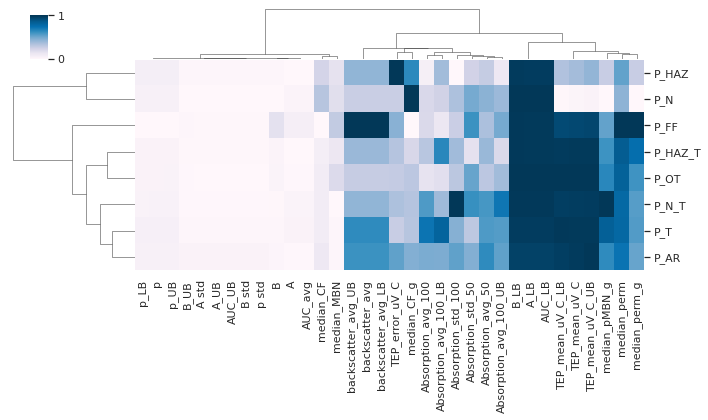

In [124]:
sns.clustermap(pipe_scaled, method='ward', cmap='PuBu', figsize=(10,6), dendrogram_ratio=(0.2, 0.2), cbar_pos=(0.05, 0.85, 0.025, 0.1))

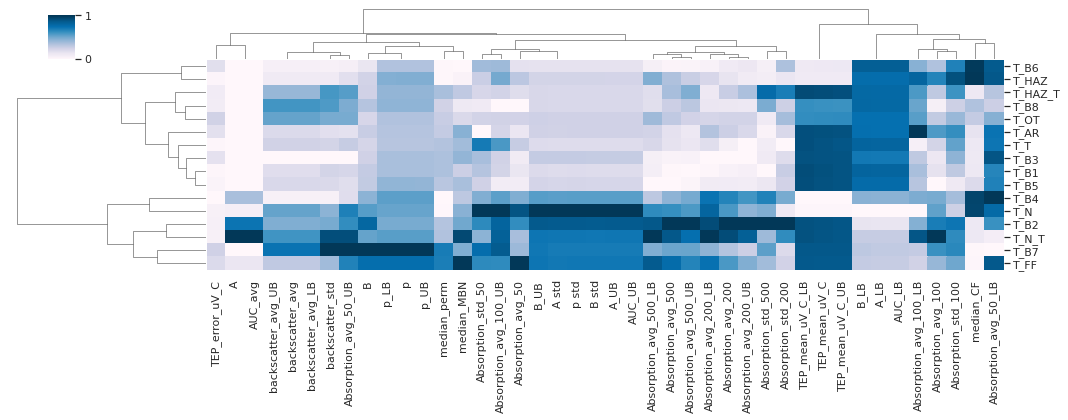

In [141]:
sns.clustermap(tube_scaled, method='ward', cmap="PuBu", figsize=(15,6), dendrogram_ratio=(0.2, 0.2), cbar_pos=(0.05, 0.85, 0.025, 0.1))

In [11]:
short_scaled_df = scaled_df.copy().loc[:,mc.without_std_g_list]
tube_scaled_short, pipe_scaled_short, \
tube_wo_blind_scaled_short, tube_blind_scaled_short = mc.get_subsample_df(short_scaled_df)

In [12]:
selected_scaled_df = scaled_df.copy().loc[:,mc.correlation_list_and_LB_UB]
tube_scaled_selected, pipe_scaled_selected, \
tube_wo_blind_scaled_selected, tube_blind_scaled_selected = mc.get_subsample_df(selected_scaled_df)

In [13]:
corr_scaled_df = scaled_df.copy().loc[:,mc.correlation_list]
tube_scaled_corr, pipe_scaled_corr, \
tube_wo_blind_scaled_corr, tube_blind_scaled_corr = mc.get_subsample_df(corr_scaled_df)

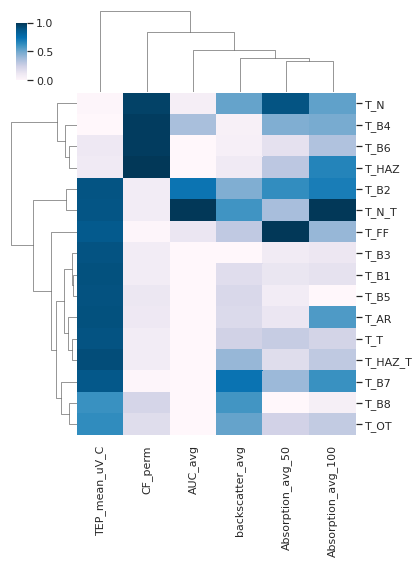

In [22]:
sns.clustermap(tube_scaled_corr, method='ward', cmap='PuBu', figsize=(6,8), dendrogram_ratio=(0.2, 0.2), cbar_pos=(0.05, 0.85, 0.025, 0.1))

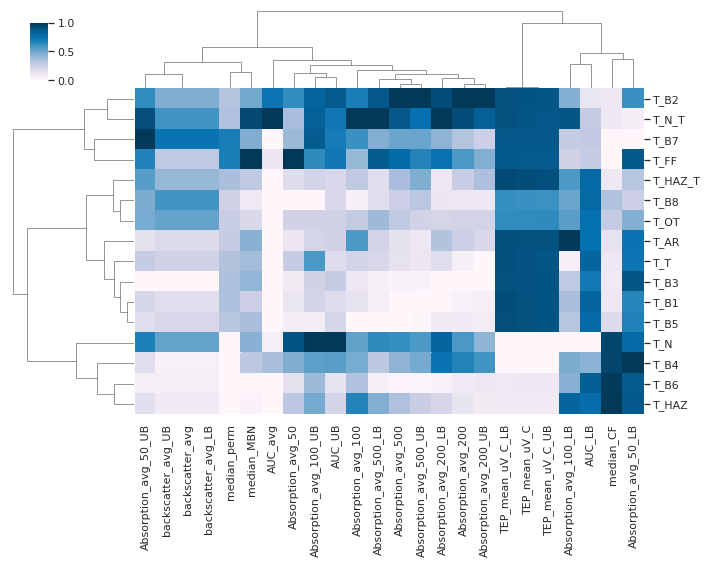

In [26]:
sns.clustermap(tube_scaled_short, method='ward', cmap='PuBu', figsize=(10,8), dendrogram_ratio=(0.2, 0.2), cbar_pos=(0.05, 0.85, 0.025, 0.1))

In [29]:
dendro

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [82.5, 82.5, 112.5, 112.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [97.5, 97.5, 142.5, 142.5],
  [65.0, 65.0, 120.0, 120.0],
  [50.0, 50.0, 92.5, 92.5],
  [13.75, 13.75, 71.25, 71.25]],
 'dcoord': [[0.0, 0.3613660437449023, 0.3613660437449023, 0.0],
  [0.0, 0.5196360483647019, 0.5196360483647019, 0.3613660437449023],
  [0.0, 0.9156426431492648, 0.9156426431492648, 0.5196360483647019],
  [0.0, 0.5012761588872184, 0.5012761588872184, 0.0],
  [0.0, 0.17123391094157872, 0.17123391094157872, 0.0],
  [0.0, 0.23635630051392265, 0.23635630051392265, 0.17123391094157872],
  [0.0, 0.19949787220963644, 0.19949787220963644, 0.0],
  [0.0, 0.40014031568040975, 0.40014031568040975, 0.19949787220963644],
  [0.23635630051392265,
   0.5779

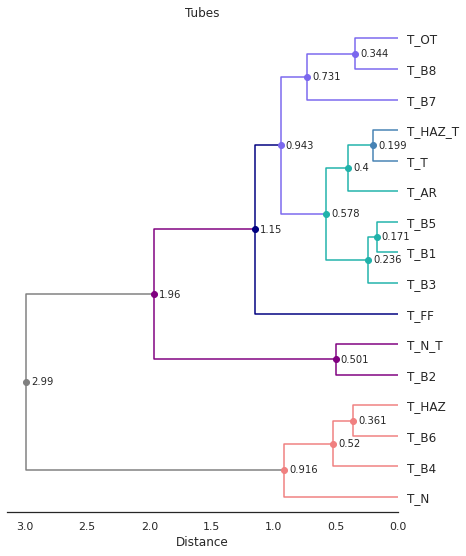

In [59]:
sns.set_theme(style="white")

Z = hierarchy.linkage(tube_scaled_corr,
method='ward',
metric='euclidean')

ax, fig = plt.subplots(figsize=(7,9))
color = 4*['gray',  
           'lightseagreen',  'steelblue', 'lightseagreen', 'mediumslateblue', 'lightcoral',
           'lightseagreen',  'purple',  'lightcoral',  'lightseagreen',
            'mediumslateblue',  'lightcoral', 'mediumslateblue', 'navy', 'purple']

dendro = hierarchy.dendrogram(Z, labels=tube_scaled_corr.index, leaf_rotation=0, orientation='left',
                         link_color_func=lambda k: color[k])
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    y = 0.5 * sum(i[1:3])
    x = d[1]
    #if y > 0:
    plt.plot(x, y, 'o', c=c)
    plt.annotate('%.3g'%x, (x, y), xytext=(5, -5),
                 textcoords = 'offset points',
                 va='bottom', ha='left',
                 fontsize=10
                )


plt.xlabel('Distance')
plt.title('Tubes')
sns.despine(left=True)

In [ ]:
from sklearn import metrics
metrics.silhouette_score(tube_blind_scaled_corr, )

In [84]:
from scipy.cluster.hierarchy import inconsistent, maxinconsts

depth = 5
incons = inconsistent(Z, depth)
incons
# avg, std, count, inconsistency 

array([[ 0.17123391,  0.        ,  1.        ,  0.        ],
       [ 0.19949787,  0.        ,  1.        ,  0.        ],
       [ 0.20379511,  0.04604848,  2.        ,  0.70710678],
       [ 0.34351111,  0.        ,  1.        ,  0.        ],
       [ 0.36136604,  0.        ,  1.        ,  0.        ],
       [ 0.29981909,  0.14187563,  2.        ,  0.70710678],
       [ 0.50127616,  0.        ,  1.        ,  0.        ],
       [ 0.44050105,  0.11191379,  2.        ,  0.70710678],
       [ 0.31703505,  0.17070697,  5.        ,  1.52841917],
       [ 0.5374402 ,  0.27425715,  2.        ,  0.70710678],
       [ 0.59888158,  0.28550924,  3.        ,  1.10945993],
       [ 0.45035317,  0.27730629,  8.        ,  1.77571365],
       [ 0.52820328,  0.34904467,  9.        ,  1.78430127],
       [ 0.76088877,  0.53771054,  9.        ,  2.23677276],
       [ 1.06590116,  0.81877219, 10.        ,  2.35532482]])

In [83]:
maxinconsts(Z, incons)

array([0.        , 0.        , 0.70710678, 0.        , 0.        ,
       0.70710678, 0.        , 0.70710678, 1.01339897, 0.70710678,
       0.70710678, 1.04856914, 1.04856914, 1.04856914, 1.04856914])

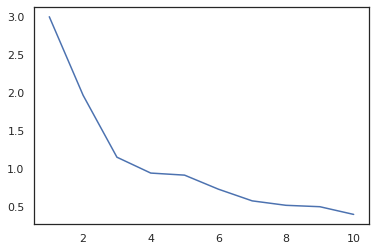

In [75]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

In [81]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 1.2, depth=3)

array([3, 2, 3, 1, 3, 1, 5, 5, 4, 1, 2, 4, 5, 6, 1, 4], dtype=int32)

In [23]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(tube_scaled_corr))
c

0.9098908232002303

In [30]:
Z

array([[ 4.        ,  5.        ,  0.21686209,  2.        ],
       [ 1.        ,  2.        ,  0.23753799,  2.        ],
       [ 3.        ,  8.        ,  0.27890326,  3.        ],
       [ 6.        ,  7.        ,  0.45053158,  2.        ],
       [ 9.        , 10.        ,  0.75581714,  5.        ],
       [ 0.        , 12.        ,  0.7808899 ,  6.        ],
       [11.        , 13.        ,  1.4979386 ,  8.        ]])

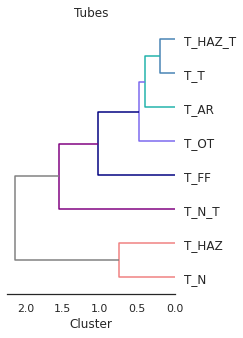

In [20]:
sns.set_theme(style="white")

Z = hierarchy.linkage(tube_wo_blind_scaled_selected,
method='ward',
metric='euclidean')

ax, fig = plt.subplots(figsize=(3,5))
color = 2*['steelblue', 'lightseagreen', 'mediumslateblue', 'lightcoral', 'navy', 'purple', 'gray', 'gray']
d = hierarchy.dendrogram(Z, labels=tub.index, leaf_rotation=0, orientation='left',
                         link_color_func=lambda k: color[k])

plt.xlabel('Distance')
plt.title('Tubes')
sns.despine(left=True)

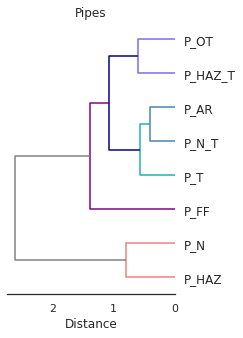

In [25]:
sns.set_theme(style="white")

Z = hierarchy.linkage(pipe_scaled_short,
method='ward',
metric='euclidean')

ax, fig = plt.subplots(figsize=(3,5))
color = 2*['steelblue', 'lightseagreen', 'mediumslateblue', 'lightcoral', 'navy', 'purple', 'gray', 'gray']
d = hierarchy.dendrogram(Z, labels=pipe_scaled_short.index, leaf_rotation=0, orientation='left', 
                         distance_sort='descending',
                         link_color_func=lambda k: color[k])

plt.xlabel('Distance')
plt.title('Pipes')
sns.despine(left=True)

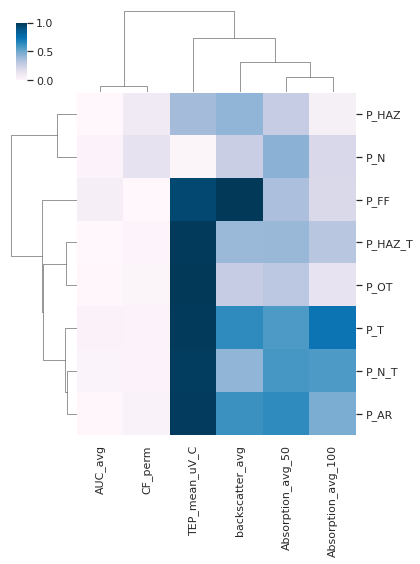

In [26]:
sns.clustermap(pipe_scaled_corr, method='ward', cmap='PuBu', figsize=(6,8), dendrogram_ratio=(0.2, 0.2), cbar_pos=(0.05, 0.85, 0.025, 0.1))

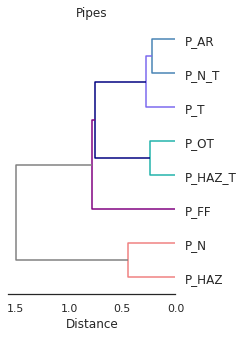

In [27]:
sns.set_theme(style="white")

Z = hierarchy.linkage(pipe_scaled_corr,
method='ward',
metric='euclidean')

ax, fig = plt.subplots(figsize=(3,5))
color = 2*['steelblue', 'lightseagreen', 'mediumslateblue', 'lightcoral', 'navy', 'purple', 'gray', 'gray']
d = hierarchy.dendrogram(Z, labels=pipe_scaled_corr.index, leaf_rotation=0, orientation='left', 
                         distance_sort='descending',
                         link_color_func=lambda k: color[k])

plt.xlabel('Distance')
plt.title('Pipes')
sns.despine(left=True)

In [ ]:
import plotly.figure_factory as ff
import plotly.io as pio
dendro = ff.create_dendrogram(pipe_scaled, distfun='ward')
dendro.update_layout(width=800, height=500)
dendro.show()
pio.write_json(dendro, 'test.plotly')